In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()




In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rlf = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print(
    "Single Tree:{}".format(score_c),
    "Random Forest:{}".format(score_r)
      )

Single Tree:0.9444444444444444 Random Forest:0.9814814814814815


### RF和DT再一组交叉验证下的对比

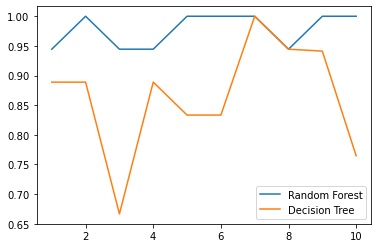

In [5]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier()
rfc_s = cross_val_score(rfc,wine.data,wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target, cv=10)

plt.plot(range(1,11) ,rfc_s, label="Random Forest")
plt.plot(range(1,11) ,clf_s, label="Decision Tree")

plt.legend()
plt.show()

### 10组交叉验证

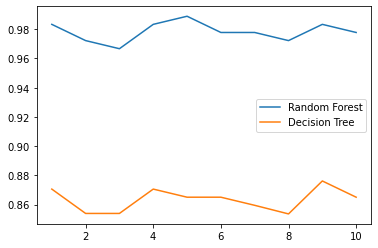

In [7]:
rfc_1 = []
clf_1 = []

for i in range(10):
    rfc = RandomForestClassifier()
    rfc_s = cross_val_score(rfc,wine.data,wine.target, cv=10).mean()

    rfc_1.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target, cv=10).mean()
    clf_1.append(clf_s)

plt.plot(range(1,11) ,rfc_1, label="Random Forest")
plt.plot(range(1,11) ,clf_1, label="Decision Tree")

plt.legend()
plt.show()

### 6.n_estimators的学习曲线

In [ ]:
### [WARING 5M Token]
superpa = []

for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target, cv=10).mean()
    superpa.append(rfc_s)

print(max(superpa),superpa.index(max(superpa)))

plt.figure(figsize=[20,5])
plt.plot(range(1,201), superpa)
plt.show()